<a href="https://colab.research.google.com/github/pranavkantgaur/ML-course/blob/main/ml_x_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Eigen value and Eigen vectors


## PCA
* Concepts:
  * The main idea behind this technique is to reduce the dimensionality of data that is highly correlated by transforming the original set of vectors to a new set which is known as Principal component.
  * Transformations: https://miro.medium.com/max/1400/1*LwmAwpNTGQ_a7n--n3LQpA.jpeg
  * Linear dimesnionality reduction technique
  * Methods of computing PCA:
    * Data matrix->Covariance matrix->Eigendecomposition->Extract primary components
    * Data matrix->SVD->Extract primary components
* Examples:
  * No. of rooms, carpet area, proximity to park(unrelated variable), prox. to bus station, prox. to train station(dependant on bus stat.), prox. to market, flat-price

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd

In [19]:
X =  pd.read_csv('/content/car_evaluation.csv')

In [35]:
y_labels = X['decision'].unique()
y = X['decision']
#y = X['decision']
#y_unique_values = y.unique()
#print(X['decision'])

In [36]:
print(y)

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: decision, Length: 1728, dtype: object


In [3]:
#X.head()
X = X.drop('decision', axis = 1)
X.head()

,buy_price,maintenance_cost,no_of_doors,no_of_persons,boot_space,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
feature_list = X.columns
print(feature_list)
for feature in feature_list:
  feature_column = X[feature]
  le.fit(feature_column)
  print(le.classes_)
  X[feature] = le.transform(feature_column)

le.fit(y)
y = le.transform(y)

Index(['buy_price', 'maintenance_cost', 'no_of_doors', 'no_of_persons',
       'boot_space', 'safety'],
      dtype='object')
['high' 'low' 'med' 'vhigh']
['high' 'low' 'med' 'vhigh']
['2' '3' '4' '5more']
['2' '4' 'more']
['big' 'med' 'small']
['high' 'low' 'med']


In [31]:
le.fit(y)
y = le.transform(y)

In [32]:
print(y)

[2 0 3 1]


In [11]:
pca = PCA(n_components=3)

In [39]:
pca.fit(X)
#PCA(n_components=2)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.2173913 0.2173913 0.2173913]
[46.47580015 46.47580015 46.47580015]


In [13]:
X = pca.transform(X)

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [37]:
name_label = [(y, id) for id, y in enumerate(y)]
print(name_label)

[('unacc', 0), ('unacc', 1), ('unacc', 2), ('unacc', 3), ('unacc', 4), ('unacc', 5), ('unacc', 6), ('unacc', 7), ('unacc', 8), ('unacc', 9), ('unacc', 10), ('unacc', 11), ('unacc', 12), ('unacc', 13), ('unacc', 14), ('unacc', 15), ('unacc', 16), ('unacc', 17), ('unacc', 18), ('unacc', 19), ('unacc', 20), ('unacc', 21), ('unacc', 22), ('unacc', 23), ('unacc', 24), ('unacc', 25), ('unacc', 26), ('unacc', 27), ('unacc', 28), ('unacc', 29), ('unacc', 30), ('unacc', 31), ('unacc', 32), ('unacc', 33), ('unacc', 34), ('unacc', 35), ('unacc', 36), ('unacc', 37), ('unacc', 38), ('unacc', 39), ('unacc', 40), ('unacc', 41), ('unacc', 42), ('unacc', 43), ('unacc', 44), ('unacc', 45), ('unacc', 46), ('unacc', 47), ('unacc', 48), ('unacc', 49), ('unacc', 50), ('unacc', 51), ('unacc', 52), ('unacc', 53), ('unacc', 54), ('unacc', 55), ('unacc', 56), ('unacc', 57), ('unacc', 58), ('unacc', 59), ('unacc', 60), ('unacc', 61), ('unacc', 62), ('unacc', 63), ('unacc', 64), ('unacc', 65), ('unacc', 66), ('un

In [43]:
X = X.to_numpy()

vhigh
vhigh
vhigh
vhigh


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:191: RuntimeWarning: invalid value encountered in long_scalars
  ret = ret / rcount
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice.
  del sys.path[0]


TypeError: ignored

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


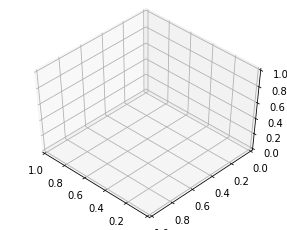

In [44]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)

plt.cla()
name_label = [(y_label, id) for id, y_label in enumerate(y_labels)]
for name, label in name_label:
    #print(X[y == label, 0])
    #print(X[0, 0])
    ax.text3D(        
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()




## T-SNE
* https://www.geeksforgeeks.org/difference-between-pca-vs-t-sne/